<p align=center>
<img src="assets/cphbanner.png" width=1280>
</p>

# **Project 2: Machine Learning-based Causal Effect Estimation [30 points]**

Causality is a central concept in science and medicine. The fundamental goal of medical research is to understand whether an intervention has a causal effect on the outcomes of a specific patient population. Answering
such causal questions require randomization of the intervention and comparison of outcomes of treated patients against a control group. However, conducting randomized trials is not always feasible, and we often
need to estimate causal effects from observational dataset. The goal of this project is to test your understanding
of some of the causal inference concepts studied in class, as well as apply and develop machine learning-based
methods for causal effect estimation.

### Instructions

This is <u> not a group project and students will be graded individually</u>. This project has two deliverables:

- A report summarizing your results. The report should include point-by-point answers to the questions below. Please submit your report (in pdf format) via the [bcourses](https://bcourses.berkeley.edu/courses/1531248) website for CPH200B.
- A zip file with your codebase. You can fork this repo and add your code to it. Please submit both your code and report using the [Gradescope](https://www.gradescope.com/courses/684408) website for CPH200B. You will get feedback on both your report and code via Gradescope.

**Please submit your report and code by <u> Thursday 2/27 11:59 PST </u>.**

## Task 2.1: Warm-up Exercise: Hypothesis Testing & Confounding [8 pts]

The most basic form of causal inference involves comparing survival curves in different groups stratified by an
intervention of interest. In this task, we will implement hypothesis testing methods to examine whether differences between the outcomes of treated and untreated patients are statistically significant, and whether these
difference reflect the causal effect of the intervention.

####  Setup and Dataset

The dataset we will use in this task was extracted from the electronic health records (EHRs) of 299 heart failure patients from the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015. The cohort included 105 women and 194 men, and their ages range between 40 and 95 years old. All 299 patients had left ventricular systolic dysfunction and had previous heart failures (HF) that put them in classes III or IV of New York Heart Association (NYHA) classification of the stages of heart failure. The dataset contains 13 features, which report clinical, body, and lifestyle information. The patients were followed up for 130 days on average (maximum follow-up period was 285 days). The event of interest was death during the follow-up period. 

For all the tasks below, we will use the UNOS heart transplant [1] dataset from Project 1.

#### Tasks and Deliverables

Please complete the following tasks. Your report should include the results for each task (i.e., tables or plots) along with your answers to the questions associated with each task.

**Done Task 2.1.1 [2 pts].** Implement the Log-Rank test from scratch in Python. Using the UNOS dataset, apply your implemented test to check whether the survival outcomes of patients on ventricular assist device (VAD) support differ from those of patients without VAD support. Compare your results with the built-in function for Log-Rank testing in the lifelines library.

**Done Task 2.1.2 [2 pts].** Propose a method to determine if there are confounders in the UNOS dataset for the effect of VAD support on survival outcomes. List all detected confounders. Additionally, consider the possibility of hidden confounders not collected in UNOS data. Specify potential hidden confounders for the VAD intervention and explain why these variables may have a confounding effect.

**Done Task 2.1.3 [2 pts].** For the comparison of survival curves to have a causal interpretation, we need to adjust for confounding variables that may cause the patient groups being compared to have different clinical features. Propose a propensity-weighted version of the Kaplan-Meier estimator you implemented in Project 1 that adjusts for confounding variables. Plot the propensity-weighted Kaplan-Meier curves in patients with VAD and without VAD. Compare this plot with the survival curves of both groups using the standard (unadjusted) Kaplan-Meier estimators.

**Task 2.1.4 [2 pts].** Propose a propensity-weighted version of the Long-Rank test. Apply this test to check whether the survival outcomes of patients on VAD support differ from those of patients without VAD. Compare the result of this test with the unadjusted test you implemented in Task 2.1.1. Comment on the results.

## Solution

## 2.1.1

In [25]:
# >> Write your code here <<
import pandas as pd
import numpy as np
from lifelines.statistics import logrank_test

from lifelines import KaplanMeierFitter
from scipy.stats import ttest_ind, chi2_contingency, chi2


dataset = pd.read_csv("../Project 1/data/UNOS_train.csv")
dataset

,Unnamed: 0,wl_id_code,init_age,gender,hgt_cm_tcr,wgt_kg_tcr,diab,prev_tx,num_prev_tx,ventilator_tcr,...,days_stat2,days_stat1b,init_bmi_calc,vad_while_listed,tah,inotropic,init_date,end_date,Censor (Censor = 1),Survival Time
0,0,190772,58,1,168.00,70.0000,0,0,0,0,...,0,0,24.801587,0,0,0,2/28/1994,3/25/1994,0,25
1,1,763510,0,1,53.00,3.7000,0,1,1,0,...,0,0,13.171947,0,0,0,2/28/1994,3/2/1994,1,2
2,2,39269,39,1,160.00,80.0000,0,0,0,0,...,112,0,31.250000,0,0,0,3/2/1994,6/18/1999,0,1934
3,3,656721,41,1,170.18,63.9600,0,0,0,0,...,428,0,22.084696,0,0,0,1/23/1991,7/25/1997,0,2375
4,4,196059,22,1,165.00,61.0000,0,0,0,0,...,536,0,22.405877,0,0,0,11/11/1992,5/20/1994,0,555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27921,36295,90064,58,0,165.00,64.0000,0,0,0,0,...,0,0,23.507805,0,0,0,1/19/2008,1/21/2008,1,2
27922,36296,579733,64,1,175.26,112.0373,1,0,0,0,...,0,137,36.475144,0,0,0,3/3/2009,11/23/2009,0,265
27923,36300,769462,66,0,172.72,63.5030,0,0,0,0,...,421,0,21.286732,0,0,0,3/3/2009,5/11/2010,1,434
27924,36303,208288,45,1,175.26,79.8322,1,0,0,0,...,61,0,25.990371,0,0,0,3/3/2009,5/3/2009,0,61


In [3]:
group1 = dataset.loc[dataset['vad_while_listed']==0]['Survival Time'].to_numpy()
group2 = dataset.loc[dataset['vad_while_listed']==1]['Survival Time'].to_numpy()

In [7]:
# Perform the log-rank test using lifelines
results = logrank_test(group1, group2)

# Extract the p-value from the results
p_value = results.p_value
print(p_value)

0.7581443383465346


In [28]:
def get_survival_table(group1, group2, weight_A=None, weights_B=None):
    all_times = sorted(pd.unique(list(group1)+list(group2)))
    d = {
        0: [],
        1: []
    }
    n = {
        0: [],
        1: []
    }

    for time in all_times:
        # event at t_i + at_risk at t_i
        # control 
        n[0].append(len(np.argwhere(group1 >= time)))
        # treated
        n[1].append(len(np.argwhere(group2 >= time)))

        # event at t_i 
        # control 
        d[0].append(len(np.argwhere(group1 == time)))
        # treated
        d[1].append(len(np.argwhere(group2 == time)))
    return n, d, all_times

def get_expectation_variance(n_0, n_1, d):
    n = n_0 + n_1
    exp = (n_1/n) * d
    if n-1 == 0:
        return exp, 0
    var = n_0 * n_1 * d * (n-d) / (n*n*(n-1))
    return exp, var

def calculate_z_stat(n, d, all_times):
    exps_sub = []
    vars = []
    for i in range(len(all_times)):
        exp, var = get_expectation_variance(n[0][i], n[1][i], d[0][i]+d[1][i])
        exps_sub.append(d[1][i]-exp) 
        vars.append(var)
    Z = np.abs(sum(exps_sub)/np.sqrt(sum(vars)))
    return Z

n, d, all_times = get_survival_table(group1, group2)
Z = calculate_z_stat(n, d, all_times)
p_value = chi2.sf(Z**2, 1)
p_value


/var/folders/3g/vclrc2cx41zbt6zkyn57d_mc0000gn/T/ipykernel_828/1589134861.py:2: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_times = sorted(pd.unique(list(group1)+list(group2)))


0.7581443383465387

                  vad_while_listed  Survival Time  wl_id_code  init_age  \
vad_while_listed          1.000000      -0.011169    0.018164  0.052222   
Survival Time            -0.011169       1.000000   -0.010121  0.069102   
wl_id_code                0.018164      -0.010121    1.000000  0.011528   
init_age                  0.052222       0.069102    0.011528  1.000000   
gender                   -0.019627       0.015979   -0.000319  0.229602   
hgt_cm_tcr                0.042391       0.103833    0.001626  0.720043   
wgt_kg_tcr                0.052565       0.135305    0.004676  0.619871   
diab                      0.030089       0.000041   -0.002072  0.246322   
prev_tx                  -0.030674      -0.077292   -0.000467 -0.057302   
num_prev_tx              -0.028606      -0.073993   -0.004124 -0.055674   
ventilator_tcr           -0.002781      -0.131429   -0.002959 -0.253803   
ecmo_tcr                 -0.014383      -0.077173    0.009541 -0.262069   
most_rcnt_creat          

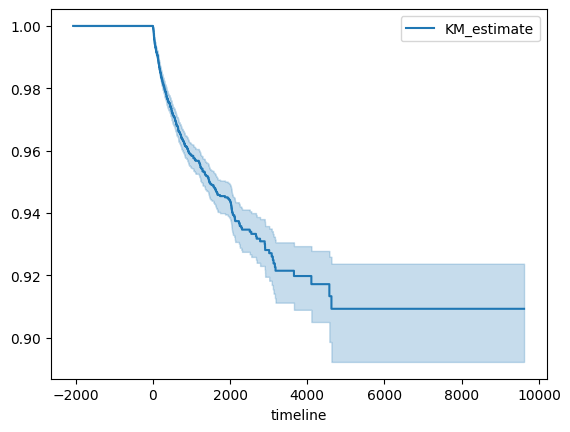

In [24]:
treatment_variable = 'vad_while_listed'
outcome_variable = 'Survival Time'

potential_confounders = ['wl_id_code', 'init_age', 'gender', 'hgt_cm_tcr',
       'wgt_kg_tcr', 'diab', 'prev_tx', 'num_prev_tx', 'ventilator_tcr',
       'ecmo_tcr', 'most_rcnt_creat', 'abo_A', 'abo_B', 'abo_O', 'abo_AB',
       'iabp_tcr', 'days_stat1', 'days_stat1a', 'days_stat2', 'days_stat1b',
       'init_bmi_calc', 'vad_while_listed', 'tah', 'inotropic']

kmf = KaplanMeierFitter()
kmf.fit(dataset[outcome_variable], dataset[treatment_variable])
kmf.plot()

# Correlation Analysis
correlation_matrix = dataset[[treatment_variable, outcome_variable] + potential_confounders].corr()
print(correlation_matrix)

confounders = []
# Hypothesis Testing
for confounder in potential_confounders:
    if dataset[confounder].dtype == 'float64':
        t_stat, p_value = ttest_ind(dataset[dataset[treatment_variable] == 1][confounder],
                                    dataset[dataset[treatment_variable] == 0][confounder])
    else:
        contingency_table = pd.crosstab(dataset[confounder], dataset[treatment_variable])
        _, p_value, _, _ = chi2_contingency(contingency_table)
    
    print(f"Hypothesis test for {confounder}: p-value = {p_value}")
    if p_value < 0.05:
        confounders.append(confounder)
print(f'Detected confounders: {confounders}')

/Users/li-chingchen/anaconda3/envs/cph200a/lib/python3.10/site-packages/lifelines/fitters/kaplan_meier_fitter.py:338: StatisticalWarning: It looks like your weights are not integers, possibly propensity scores then?
  It's important to know that the naive variance estimates of the coefficients are biased. Instead use Monte Carlo to
  estimate the variances. See paper "Variance estimation when using inverse probability of treatment weighting (IPTW) with survival analysis"
  or "Adjusted Kaplan-Meier estimator and log-rank test with inverse probability of treatment weighting for survival data."
                  
  warnings.warn(
/Users/li-chingchen/anaconda3/envs/cph200a/lib/python3.10/site-packages/lifelines/fitters/kaplan_meier_fitter.py:338: StatisticalWarning: It looks like your weights are not integers, possibly propensity scores then?
  It's important to know that the naive variance estimates of the coefficients are biased. Instead use Monte Carlo to
  estimate the variances. See 

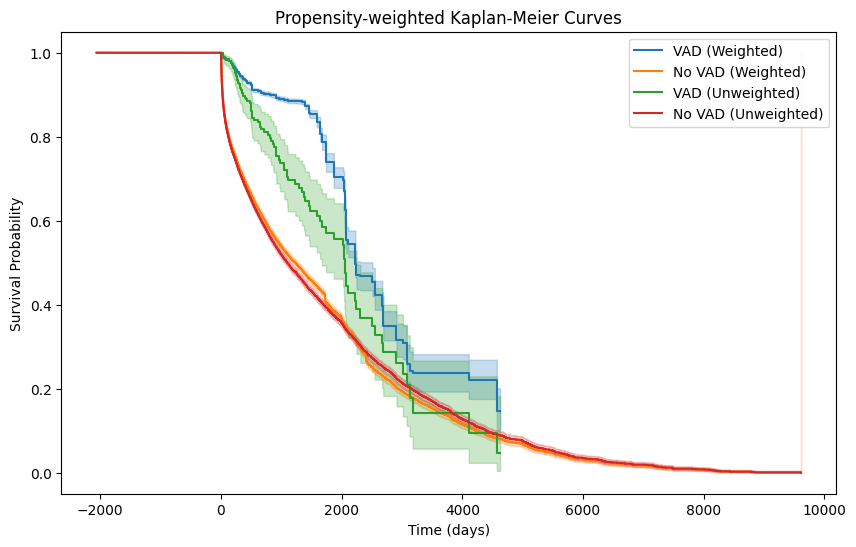

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Calculate Propensity Scores
X = dataset[confounders]
y = dataset['vad_while_listed']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
propensity_model = LogisticRegression()
propensity_model.fit(X_scaled, y)
propensity_scores = propensity_model.predict_proba(X_scaled)[:, 1]

# Step 2: Assign Propensity Weights
weights_vad = 1 / propensity_scores[dataset['vad_while_listed'] == 1]
weights_no_vad = 1 / (1 - propensity_scores[dataset['vad_while_listed'] == 0])

# Step 3: Weighted Kaplan-Meier Estimation
kmf_weighted_vad = KaplanMeierFitter()
kmf_weighted_vad.fit(group2, event_observed=dataset.loc[dataset['vad_while_listed']==1]['Censor (Censor = 1)'], weights=weights_vad)

kmf_weighted_no_vad = KaplanMeierFitter()
kmf_weighted_no_vad.fit(group1, event_observed=dataset.loc[dataset['vad_while_listed']==0]['Censor (Censor = 1)'], weights=weights_no_vad)


kmf_vad = KaplanMeierFitter()
kmf_vad.fit(group2, event_observed=dataset.loc[dataset['vad_while_listed']==1]['Censor (Censor = 1)'])

kmf_no_vad = KaplanMeierFitter()
kmf_no_vad.fit(group1, event_observed=dataset.loc[dataset['vad_while_listed']==0]['Censor (Censor = 1)'])

# Step 4: Plot Propensity-Weighted Kaplan-Meier Curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
kmf_weighted_vad.plot(label='VAD (Weighted)')
kmf_weighted_no_vad.plot(label='No VAD (Weighted)')

kmf_vad.plot(label='VAD (Unweighted)')
kmf_no_vad.plot(label='No VAD (Unweighted)')

plt.title('Propensity-weighted Kaplan-Meier Curves')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()


In [38]:
import pandas as pd
import numpy as np
from lifelines.statistics import logrank_test
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Step 1: Calculate Propensity Scores
X = dataset[confounders]
y = dataset['vad_while_listed']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
propensity_model = LogisticRegression()
propensity_model.fit(X_scaled, y)
propensity_scores = propensity_model.predict_proba(X_scaled)[:, 1]

# Step 2: Assign Propensity Weights
weights_vad = 1 / propensity_scores[dataset.loc[dataset['vad_while_listed'] == 1].index]
weights_no_vad = 1 / (1 - propensity_scores[dataset.loc[dataset['vad_while_listed'] == 0].index])

# Step 3: Weighted Log-Rank Test
results_weighted = logrank_test(dataset.loc[dataset['vad_while_listed']==1]['Survival Time'], 
                                dataset.loc[dataset['vad_while_listed']==0]['Survival Time'], 
                                weights_A=weights_vad, weights_B=weights_no_vad)

p_value = results_weighted.p_value
# Step 4: Hypothesis Testing
alpha = 0.05
if p_value < alpha:
    print(f"p-value: {p_value}. Reject the null hypothesis. There is a significant difference in survival outcomes between patients with and without VAD support.")
else:
    print(f"p-value: {p_value}. Fail to reject the null hypothesis. There is no significant difference in survival outcomes between patients with and without VAD support.")


p-value: 3.6269045345789e-57. Reject the null hypothesis. There is a significant difference in survival outcomes between patients with and without VAD support.


In [41]:
n_weighted, d_weighted, all_times = get_survival_table(weights_no_vad, weights_vad)
Z_weighted = calculate_z_stat(n_weighted, d_weighted, all_times)
p_value_weighted = chi2.sf(Z_weighted**2, 1)
p_value_weighted

/var/folders/3g/vclrc2cx41zbt6zkyn57d_mc0000gn/T/ipykernel_6066/769852823.py:2: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_times = sorted(pd.unique(list(group1)+list(group2)))


0.0

In [24]:
num_strata = 5
strata = pd.qcut(propensity_scores, num_strata, labels=False)

# Step 3: Perform Log-Rank Test within Each Stratum
p_values = []
for stratum in range(num_strata):
    group1 = dataset.loc[(dataset['vad_while_listed'] == 0) & (strata == stratum)]['Survival Time'].to_numpy()
    group2 = dataset.loc[(dataset['vad_while_listed'] == 1) & (strata == stratum)]['Survival Time'].to_numpy()
    
    # Perform log-rank test within each stratum
    # Use your existing implementation here
    n_weighted, d_weighted, all_times = get_survival_table(group1, group2)
    Z_weighted = calculate_z_stat(n_weighted, d_weighted, all_times)
    p_value = chi2.sf(Z_weighted**2, 1)
    # Append the p-value to the list of p-values
    p_values.append(p_value)

# Step 4: Combine Results
overall_p_value = np.mean(p_values)


print("Propensity-Weighted Log-Rank Test p-value:", overall_p_value)


Propensity-Weighted Log-Rank Test p-value: 0.10543856747261829


/var/folders/3g/vclrc2cx41zbt6zkyn57d_mc0000gn/T/ipykernel_6066/769852823.py:2: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_times = sorted(pd.unique(list(group1)+list(group2)))


## Task 2.2 Estimating Average Treatment Effects [8 pts]

#### Clinical Background, Dataset, and Setup

In this task, we will use individual patient data from the International Stroke Trial (IST), one of the largest randomized trials ever conducted in acute stroke [2]. The trial investigated the impact of aspirin and subcutaneous heparin on patients with acute ischemic stroke, with treatment randomization within 48 hours of symptom onset. The trial findings indicated no effect of both aspirin and heparin on 14-day and 6-month mortality. The trial protocol and data dictionary have been provided to you. The original IST data lacks confounding as it was generated through a randomized trial. The instructor introduced confounding artificially by filtering patients out of the trial using a random function that depends on the patient features. The resulting dataset mimics an observational dataset where treatment is assigned through a mechanism that depends on patient features.

#### Tasks and Deliverables

Estimate the average effect of aspirin and heparin on 14-day mortality using the following estimators. For each estimator, construct a 95% confidence interval around your estimate. Compare your estimates with those of the original trial and provide commentary on the results.

**Task 2.2.1 [2 pts].** A standard difference-in-means estimator.

**Task 2.2.2 [2 pts].** An inverse propensity weighting (IPW) estimator.

**Task 2.2.3 [2 pts].** A covariate adjustment estimator using a Gradient Boosting model with T-learner, Slearner, and X-learner architectures.

**Task 2.2.4 [2 pts].** A doubly-robust estimator that combines the propensity model from Task 2.2.2 and the outcomes model based on the X-learner in Task 2.2.3.

The IST data was shared with you via UCSF Box. You can find the modified trial data with artificially-generated confounding in "IST_observational.csv". The data dictionary is provided in "IST_variables.csv" and the trial protocol can be found in IST-1_protocol.pdf.

## Solution

In [3]:
# >> Write your code here <<
import pandas as pd
import numpy as np
from lifelines.statistics import logrank_test

from lifelines import KaplanMeierFitter
from scipy.stats import ttest_ind, chi2_contingency, chi2

ist_data = pd.read_csv('data/IST/IST_observational.csv')
ist_data

,Unnamed: 0,HOSPNUM,RDELAY,RCONSC,SEX,AGE,RSLEEP,RATRIAL,RCT,RVISINF,...,H14,ISC14,NK14,STRK14,HTI14,PE14,DVT14,TRAN14,NCB14,include
0,4,4,20,F,M,78,N,NaN,N,N,...,0,0,0,0,0,0,0,0,0,1
1,7,1,24,F,M,23,N,NaN,Y,N,...,0,0,0,0,0,0,0,0,0,1
2,13,1,12,F,F,86,Y,NaN,Y,N,...,0,0,0,0,0,0,0,0,0,1
3,19,6,4,F,M,74,N,NaN,N,N,...,0,0,0,0,0,0,0,0,0,1
4,24,1,17,F,M,57,N,NaN,N,N,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,19407,242,6,F,F,85,N,N,Y,N,...,0,0,0,0,0,0,0,0,0,1
4760,19411,5,6,D,M,71,N,N,Y,N,...,1,0,0,1,0,0,0,0,0,1
4761,19417,144,45,F,M,71,N,N,Y,N,...,0,0,0,0,0,0,0,0,0,1
4762,19419,38,4,F,F,81,N,N,N,N,...,0,0,0,0,0,0,0,0,0,1


## difference-in-means

In [55]:
import pandas as pd
import numpy as np
from scipy.stats import norm
def diff_in_means(treated_group, control_group):
    # Calculate mortality rate for the treated group
    treated_mortality_rate = treated_group['ID14'].mean()
    # Calculate mortality rate for the control group
    control_mortality_rate = control_group['ID14'].mean()

    # Compute the difference in mortality rates
    diff_in_means = treated_mortality_rate - control_mortality_rate

    # Compute standard errors for each group
    treated_std_error = np.sqrt(treated_mortality_rate * (1 - treated_mortality_rate) / len(treated_group))
    control_std_error = np.sqrt(control_mortality_rate * (1 - control_mortality_rate) / len(control_group))

    # Compute the standard error of the difference in means
    std_error_diff = np.sqrt(treated_std_error**2 + control_std_error**2)

    # Calculate the 95% confidence interval
    conf_interval = norm.interval(0.95, loc=diff_in_means, scale=std_error_diff)

    # Print the results
    print("Estimated difference in means (treated - control):", diff_in_means)
    print("95% Confidence Interval:", conf_interval)


### aspirin

In [56]:
treated_group = ist_data[(ist_data['RXASP'] == 'Y')]
control_group = ist_data[(ist_data['RXASP'] == 'N') & (ist_data['RXHEP'] == 'N')]

diff_in_means(treated_group, control_group)

Estimated difference in means (treated - control): -0.03264589602879567
95% Confidence Interval: (-0.05430470607404359, -0.010987085983547744)


### heparin

In [57]:
treated_group = ist_data[(ist_data['RXHEP'] != 'N')]
control_group = ist_data[(ist_data['RXASP'] == 'N') & (ist_data['RXHEP'] == 'N')]

diff_in_means(treated_group, control_group)

Estimated difference in means (treated - control): -0.013550651272619313
95% Confidence Interval: (-0.03396289878427232, 0.006861596239033697)


## inverse propensity weighting

In [8]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
def regression_model(treatment=None):
    numeric_features = ['RDELAY', "AGE", 'RSBP']
    numeric_transformer = Pipeline(
        steps=[("scaler", StandardScaler())]
    )
    if treatment:
        categorical_features = [ 'RCONSC', 'SEX', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF',
            'RHEP24', 'RASP3', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5',
            'RDEF6', 'RDEF7', 'RDEF8', 'STYPE', treatment] 
    else:
        categorical_features = [ 'RCONSC', 'SEX', 'RSLEEP', 'RATRIAL', 'RCT', 'RVISINF',
            'RHEP24', 'RASP3', 'RDEF1', 'RDEF2', 'RDEF3', 'RDEF4', 'RDEF5',
            'RDEF6', 'RDEF7', 'RDEF8', 'STYPE'] 
    categorical_transformer = Pipeline(
        steps=[
            ("encoder", OneHotEncoder(handle_unknown="ignore"))
        ]
    )
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features),
        ]
    )

    return Pipeline(steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())])

In [41]:
def inverse_propensity_weighting(treated_group, control_group, treatment):
    clf = regression_model()
    clf.fit(pd.concat([treated_group, control_group]), pd.concat([treated_group[treatment].apply(lambda x: 1 if x!='N' else 0), control_group[treatment].apply(lambda x: 1 if x!='N' else 0)]))
    propensity_scores = clf.predict_proba(ist_data)[:, 1]
    weighted_outcomes_treated = 1 / propensity_scores[treated_group.index]
    weighted_outcomes_control = 1 / (1 - propensity_scores[control_group.index])

    att_treated = np.average(treated_group['ID14'], weights=weighted_outcomes_treated)
    att_control = np.average(control_group['ID14'], weights=weighted_outcomes_control)

    # tao = regression_model()
    # print(pd.concat([treated_group['ID14'], control_group['ID14']]))
    # print(pd.concat([att_treated, att_control]))
    # tao.fit(pd.concat([att_treated, att_control]), pd.concat([treated_group['ID14'], control_group['ID14']]))
    # ate = tao.predict_proba()
    treated_std = np.std(treated_group['ID14'] * weighted_outcomes_treated) / np.sqrt(len(treated_group))
    

    # Margin of error for 95% CI (assuming normal distribution for simplicity)
    z = 1.96
    margin_of_error= z * treated_std

    # Confidence intervals
    ci = (att_treated - margin_of_error, att_treated + margin_of_error)

    print('ATE on 14-day mortality: ', att_treated - att_control)
    print("95% Confidence Interval:", ci)

### aspirin

In [58]:
# ATT for aspirin
aspirin_group = ist_data[ist_data['RXASP'] == 'Y']
control_group = ist_data[(ist_data['RXASP'] == 'N') & (ist_data['RXHEP'] == 'N')]
inverse_propensity_weighting(aspirin_group, control_group, 'RXASP')

ATE on 14-day mortality:  0.004421578844489155
95% Confidence Interval: (0.06634974110721373, 0.1567749299153246)


### heparin

In [59]:
# ATT for heparin
heparin_group = ist_data[ist_data['RXHEP'] != 'N']
control_group = ist_data[(ist_data['RXASP'] == 'N') & (ist_data['RXHEP'] == 'N')]
inverse_propensity_weighting(heparin_group, control_group, 'RXHEP')

ATE on 14-day mortality:  -0.0006285983916698851
95% Confidence Interval: (0.09346846729525118, 0.13850798239469092)


## covariate adjustment w/ S-learner, T-learner, and X-learner

In [64]:
def covariate_adjusment_T(treated_group, control_group):
    m_1 = regression_model()
    m_1.fit(treated_group, treated_group['ID14'])

    m_0 = regression_model()
    m_0.fit(control_group, control_group['ID14'])
    # CATE = m_1 - m_0
    x = pd.concat([treated_group, control_group])
    cate = m_1.predict_proba(x)[:, 1] - m_0.predict_proba(x)[:, 1]
    return cate.mean()
    
# incorporate treatment assignment into the feature space
def covariate_adjusment_S(treated_group, control_group, treatment, pos, neg):
    m = regression_model(treatment)
    covariates = pd.concat([treated_group, control_group])
    outcomes = pd.concat([treated_group['ID14'], control_group['ID14']])
    m.fit(covariates, outcomes)
    # CATE = m(x, t=1) - m(x, t=0)
    cate = m.predict_proba(covariates.assign(treatment=pos))[:, 1] - m.predict_proba(covariates.assign(treatment=neg))[:, 1]
    return cate.mean()

def covariate_adjusment_X(treated_group, control_group, propensity_weighting=False, treatment=None):
    # Step 1: Generate pseudo-outcomes
    m_1 = regression_model()
    m_0 = regression_model()
    m_1.fit(treated_group, treated_group['ID14'])
    m_0.fit(control_group, control_group['ID14'])
    # Step 2: Train a model to predict pseudo-outcomes
    # (Xi,Yi,Ti) = Ti ·(Yi-μb0(Xi))+(1-Ti)·(μb1(Xi)-Yi)
    x = pd.concat([treated_group, control_group])

    if propensity_weighting:
        propensity_model = regression_model()
        propensity_model.fit(pd.concat([treated_group, control_group]), pd.concat([treated_group[treatment].apply(lambda x: 1 if x!='N' else 0), control_group[treatment].apply(lambda x: 1 if x!='N' else 0)]))

        frac = (1-propensity_model.predict(treated_group))/(1e-12 + propensity_model.predict(treated_group)*(1-propensity_model.predict(treated_group)))
        y_treated = frac * (treated_group['ID14']-m_1.predict(treated_group)) + m_1.predict(treated_group) - m_0.predict(treated_group)
        
        frac = (0-propensity_model.predict(control_group))/(1e-12 +propensity_model.predict(control_group)*(1-propensity_model.predict(control_group)))
        y_control = frac * (control_group['ID14']-m_0.predict(control_group)) + m_1.predict(control_group) - m_0.predict(control_group)
        
        y = np.concatenate([y_treated, y_control])
    else:
        y = np.concatenate([treated_group['ID14'] - m_0.predict(treated_group), m_1.predict(control_group) - control_group['ID14']])

    phi = regression_model()
    phi.fit(x, y)

    cate = phi.predict_proba(x)[:, 1]
    return cate.mean()

### aspirin

In [60]:
aspirin_group = ist_data[ist_data['RXASP'] == 'Y']
control_group = ist_data[(ist_data['RXASP'] == 'N') & (ist_data['RXHEP'] == 'N')]
cate_t = covariate_adjusment_T(aspirin_group, control_group)
cate_s = covariate_adjusment_S(aspirin_group, control_group, 'RXASP', 'Y', 'N')
cate_x = covariate_adjusment_X(aspirin_group, control_group)
cate_t, cate_s, cate_x

/Users/li-chingchen/anaconda3/envs/cph200a/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/li-chingchen/anaconda3/envs/cph200a/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

(0.005787556511477972, 0.0, 0.8843635561583894)

### heapirin

In [61]:
heapirin_group = ist_data[ist_data['RXHEP'] != 'N']
control_group = ist_data[(ist_data['RXASP'] == 'N') & (ist_data['RXHEP'] == 'N')]
cate_t = covariate_adjusment_T(heapirin_group, control_group)
cate_s = covariate_adjusment_S(heapirin_group, control_group, 'RXHEP', 'M', 'N')
cate_x = covariate_adjusment_X(heapirin_group, control_group)
cate_t, cate_s, cate_x

/Users/li-chingchen/anaconda3/envs/cph200a/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/li-chingchen/anaconda3/envs/cph200a/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

(-0.0008249644632181542, 0.0, 0.8858633474326931)

## doubly robust

In [65]:
aspirin_group = ist_data[ist_data['RXASP'] == 'Y']
control_group = ist_data[(ist_data['RXASP'] == 'N') & (ist_data['RXHEP'] == 'N')]
cate_dr = covariate_adjusment_X(aspirin_group, control_group, True, 'RXASP')
cate_dr

/Users/li-chingchen/anaconda3/envs/cph200a/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.002278820388204709

In [66]:
heapirin_group = ist_data[ist_data['RXHEP'] != 'N']
control_group = ist_data[(ist_data['RXASP'] == 'N') & (ist_data['RXHEP'] == 'N')]
cate_x = covariate_adjusment_X(heapirin_group, control_group, True, 'RXHEP')
cate_x

/Users/li-chingchen/anaconda3/envs/cph200a/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.0015259783354330215

## Task 2.3 Estimating Heterogeneous Treatment Effects using Deep Counterfactual Regression [14 pts]

In this task, we will explore the application of concepts from the machine learning literature to estimate heterogeneous treatment effects. The seminal work in [3] establishes a link between estimating treatment effects and the domain adaptation problem in machine learning. Using this insight, the authors repurpose ideas from domain adaptation literature to create a new deep learning model for estimating the conditional average treatment effects (CATE) function. The core idea of their algorithm is to eliminate the confounding effect by learning a representation Φ of the input features X that aligns the distribution of treated and control populations, Φ(X|T = 1) and Φ(X|T = 0), in the representation space, referred to by the authors as a “balancing” representation.

Please read the paper carefully and complete the following tasks.

**Task 2.3.1 [5 pts].** Implement the T ARNet, CF RMMD, and CF RW ASS models proposed in [3] in PyTorch. Evaluate the performance of all models using the semi-synthetic Infant Health and Development Program (IHDP) benchmark dataset introduced in [4] and described in Sectioon 5.1 in [3]. A version of the IHDP dataset was shared with you via UCSF Box.

**Task 2.3.2 [2 pts].** Visualize the treated and control features in IHDP before and after applying the balancing representation Φ(.) using t-SNE. Comment on the results.

**Task 2.3.3 [2 pts].** Show the impact of the scaling parameter α (Eq. (3) in [3]) on the loss function on the test set for both the Wasserstein and Maximum Mean Discrepancy (MMD) regularizers.

**Task 2.3.4 [3 pts].** Use the T ARNet, CF RMMD, and CF RW ASS models to estimate average treatment effects using the IST data in Task 2.2. Assess the alignment of your estimates with the trial results and compare them to the estimators in Tasks 2.2.3 and 2.2.4.

**Task 2.3.5 [2 pts].** Identify any limitations of the balancing representations approach. Propose potential solutions to address these limitations.

## Solution

In [ ]:
# >> Write your model loading function here <<

## References

[1] Weiss, Eric S., Lois U. Nwakanma, Stuart B. Russell, John V. Conte, and Ashish S. Shah. “Outcomes in
bicaval versus biatrial techniques in heart transplantation: an analysis of the UNOS database.” The Journal
of heart and lung transplantation, vol. 27, no. 2 (2008): 178-183.

[2] International Stroke Trial Collaborative Group. “The International Stroke Trial (IST): a randomised trial
of aspirin, subcutaneous heparin, both, or neither among 19 435 patients with acute ischaemic stroke.” The
Lancet, 349.9065 (1997): 1569-1581.

[3] Shalit, U., Johansson, F. D., and D. Sontag. “Estimating individual treatment effect: generalization
bounds and algorithms.” In International conference on machine learning (pp. 3076-3085). 2017.

[4] Hill, J. L. (2011). Bayesian nonparametric modeling for causal inference. Journal of Computational and Graphical Statistics, 20(1), 217-240.